<a href="https://colab.research.google.com/github/davidrtorres/ML_Image_Processing/blob/main/Image_Thresholding_and_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image thresholding and Segmentation is useful for microscopy image processing.  What is the difference between image thresholding and segmentation?  Image Segmentation is the process of dividing or partitioning your image into multiple segments.  For example if you're a material scientist in an image you may have one region that is mineral one (porosity), mineral two (clay), mineral three (quartz) which you can separate by pixels.  Image Processing is all about image segmentation so you can understand what's going on in an image.  When we see an image that has a cat and a dog in it in your mind you're segmenting the pixels belong to the cat and the dog.  <br>
Image Thresholding is a simple form of image segmentation.  It's a subset of image segmentation. It's a way to create a binary image based on the histogram based on a threshold value.  We can set a threshold to separate each group in the image.<br>
Pixel values range from 0 to 22 for an 8 bit image.  We can set a threshold and in the histogram see all the pixels set above a threshold.  After we apply threhold the image becomes binary which means all the other pixels are turned off except for the ones that exceed the threshold.  This is the binary segmentation.  With this segmentation the background pixels are assigned a value of 0 and the regions of interest will have a value of 1. In the original image hte pixels range from 0 to 255.  With binary segmentation a pixel value either has value of 0 or 1.  Were trying to separate this image into background and nuclei.  

In [29]:
import numpy as np

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

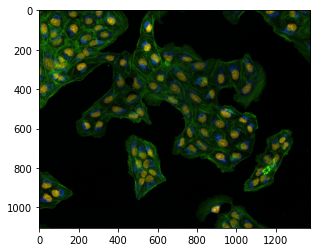

In [30]:
img = cv2.imread('/content/drive/MyDrive/datasets/Osteosarcoma_01.tif',1)
plt.imshow(img);

In [31]:
#height, width, BGR
#we have an array with 3 channels. First one is B
img.shape

(1104, 1376, 3)

In [32]:
#this means pixel values are from 0 to 255. 
img.dtype

dtype('uint8')

We're going to manually extract the B channel because they contain the nuclei pixels.

In [33]:
#how to extract the 1st channel.
#all the values from height, width, but extract only the 0 channel.
blue_channel = img[:,:,0]

In [34]:
blue_channel

array([[61, 54, 48, ..., 10, 12, 14],
       [66, 60, 55, ...,  9, 15, 19],
       [71, 66, 60, ...,  9, 11, 11],
       ...,
       [ 7,  5,  6, ...,  0,  0,  0],
       [ 7,  6,  5, ...,  0,  1,  0],
       [ 7,  7,  8, ...,  0,  1,  0]], dtype=uint8)

This is a way to visualize only the blue channels. 

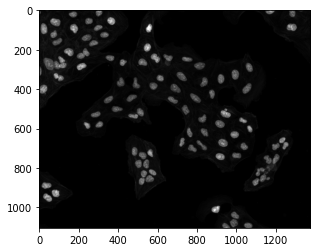

In [35]:
plt.imshow(blue_channel, cmap='gray');

We have alot of dark pixels below 40.

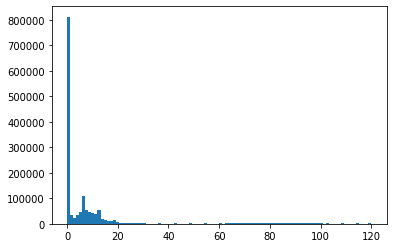

In [36]:
plt.hist(blue_channel.flat, bins=100, range=(0,120));

Above 40 we have some bright pixels.  We'll set a threshold of 40.  The threshold is set at 40.  If pixels are less than or equal to 40 we want to sort that as background.  If greater than 40 sort as nuclei.  This is a binary so the end result will be a boolean result, i,e, 1 or 0, true or false.

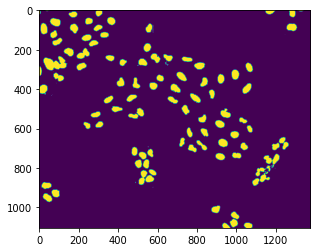

In [37]:
background = (blue_channel <=40)
nuclei = (blue_channel > 40)
plt.imshow(nuclei);

### OpenCV
OpenCV has a method called threshold and we'll apply it it on the blue channel.  Anything above 40 convert values to 255.  thresh1 is an array that has pixel values after the threshold.  This is binary thresholding.

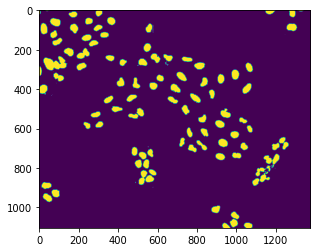

In [38]:
ret1, thresh1 = cv2.threshold(blue_channel, 40, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1);

In [39]:
ret1

40.0

In [40]:
thresh1

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

What if you don't know what the optimal place is for the histogram?  Use auto OTSU.  The system will find what the threshold value is.

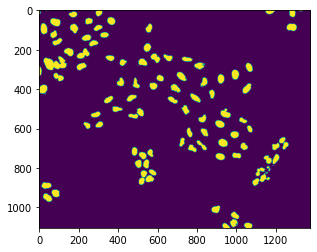

In [41]:
ret2, thresh2 = cv2.threshold(blue_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#plt.imshow(thresh2);


In [42]:
ret2

50.0

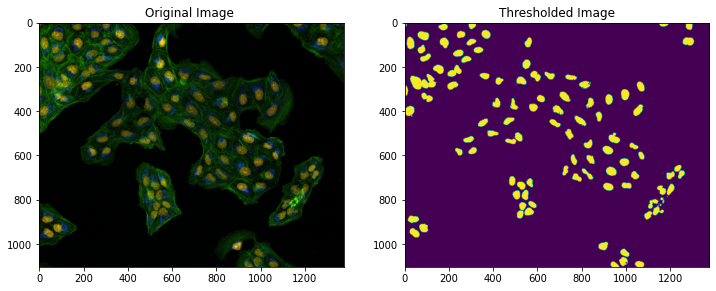

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title("Original Image ")
plt.imshow(img)
plt.subplot(122)
plt.imshow(thresh2)#, cmap='jet'
plt.title("Thresholded Image");

Multi-Thresholding
This consists of background, nuclei and something else.  For each segment it's assigning a value of 0,1,2,3 etc.

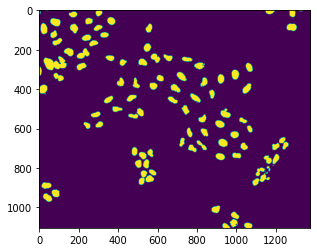

In [43]:
regions1 = np.digitize(blue_channel, bins=np.array([ret2]))
plt.imshow(regions1);